In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

# **Read The Dataset**

In [4]:
df = pd.read_csv('/content/drive/My Drive/Summative-AI/datasets/crop_and_nutrients.csv')



In [5]:
df.shape

(2200, 8)

In [6]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [7]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [10]:
# lets check for missing values in the dataset
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

As we can see there are no NaN values in the dataset

In [11]:


df.apply(lambda x: len(x.unique()))

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [12]:
# lets, check the crops present in the dataset, as well as get an idea of any imbalanced data
df['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

# **Exploratory Data Analysis**
The EDA would be done in the following:

- Correlation Matrix
- Pair Plot
-


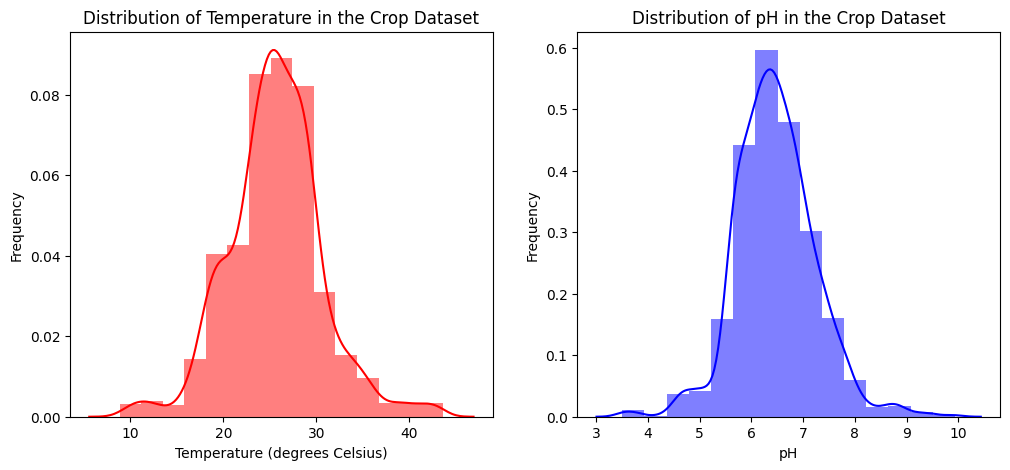

In [13]:
## Visualizing the Distribution of Temperature and pH in the Crop Dataset

import matplotlib.pyplot as plt
import seaborn as sns

# create a figure with two subplots side by side
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

# create a histogram and kernel density estimate of the 'temperature' variable in the 'crop' dataset
sns.distplot(df['temperature'], color="red", bins=15, hist_kws={'alpha':0.5})

# add a title and axis labels for the first subplot
plt.title('Distribution of Temperature in the Crop Dataset')
plt.xlabel('Temperature (degrees Celsius)')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)

# create a histogram and kernel density estimate of the 'pH' variable in the 'crop' dataset
sns.distplot(df['ph'], color="blue", bins=15, hist_kws={'alpha':0.5})

# add a title and axis labels for the second subplot
plt.title('Distribution of pH in the Crop Dataset')
plt.xlabel('pH')
plt.ylabel('Frequency')

# display the figure
plt.show()


It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!


## Correlation Matrix
Checking the correlation between different features

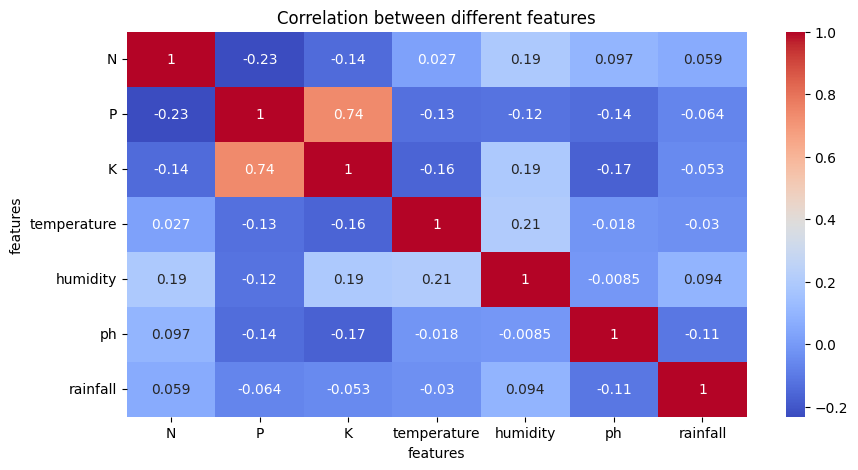

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
sns.heatmap(df.corr(), annot=True,cmap='coolwarm')
ax.set(xlabel='features')
ax.set(ylabel='features')

plt.title('Correlation between different features', fontsize = 12, c='black')
plt.show()

## N, P, K values comparision between crops


In [15]:
df_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
df_summary.head()

,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892


In [16]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# Create an empty figure object
fig = go.Figure()

# Add a bar trace for Nitrogen (N) nutrient values
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['N'],
    name='Nitrogen',    # Label for the bar trace
    marker_color='mediumvioletred'    # Color for the bars
))

# Add a bar trace for Phosphorous (P) nutrient values
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['P'],
    name='Phosphorous',    # Label for the bar trace
    marker_color='lightsalmon'    # Color for the bars
))

# Add a bar trace for Potash (K) nutrient values
fig.add_trace(go.Bar(
    x=df_summary.index,
    y=df_summary['K'],
    name='Potash',    # Label for the bar trace
    marker_color='dodgerblue'    # Color for the bars
))

# Update the layout of the chart
fig.update_layout(
    title="N, P, K values comparision between crops",    # Chart title
    plot_bgcolor='white',    # Background color of the plot
    barmode='group',    # Set the bar mode to group
    xaxis_tickangle=-45    # Rotate x-axis tick labels to -45 degrees
)

# Display the chart
fig.show()


## Pair Plot 
Another way of looking for correlation between features 


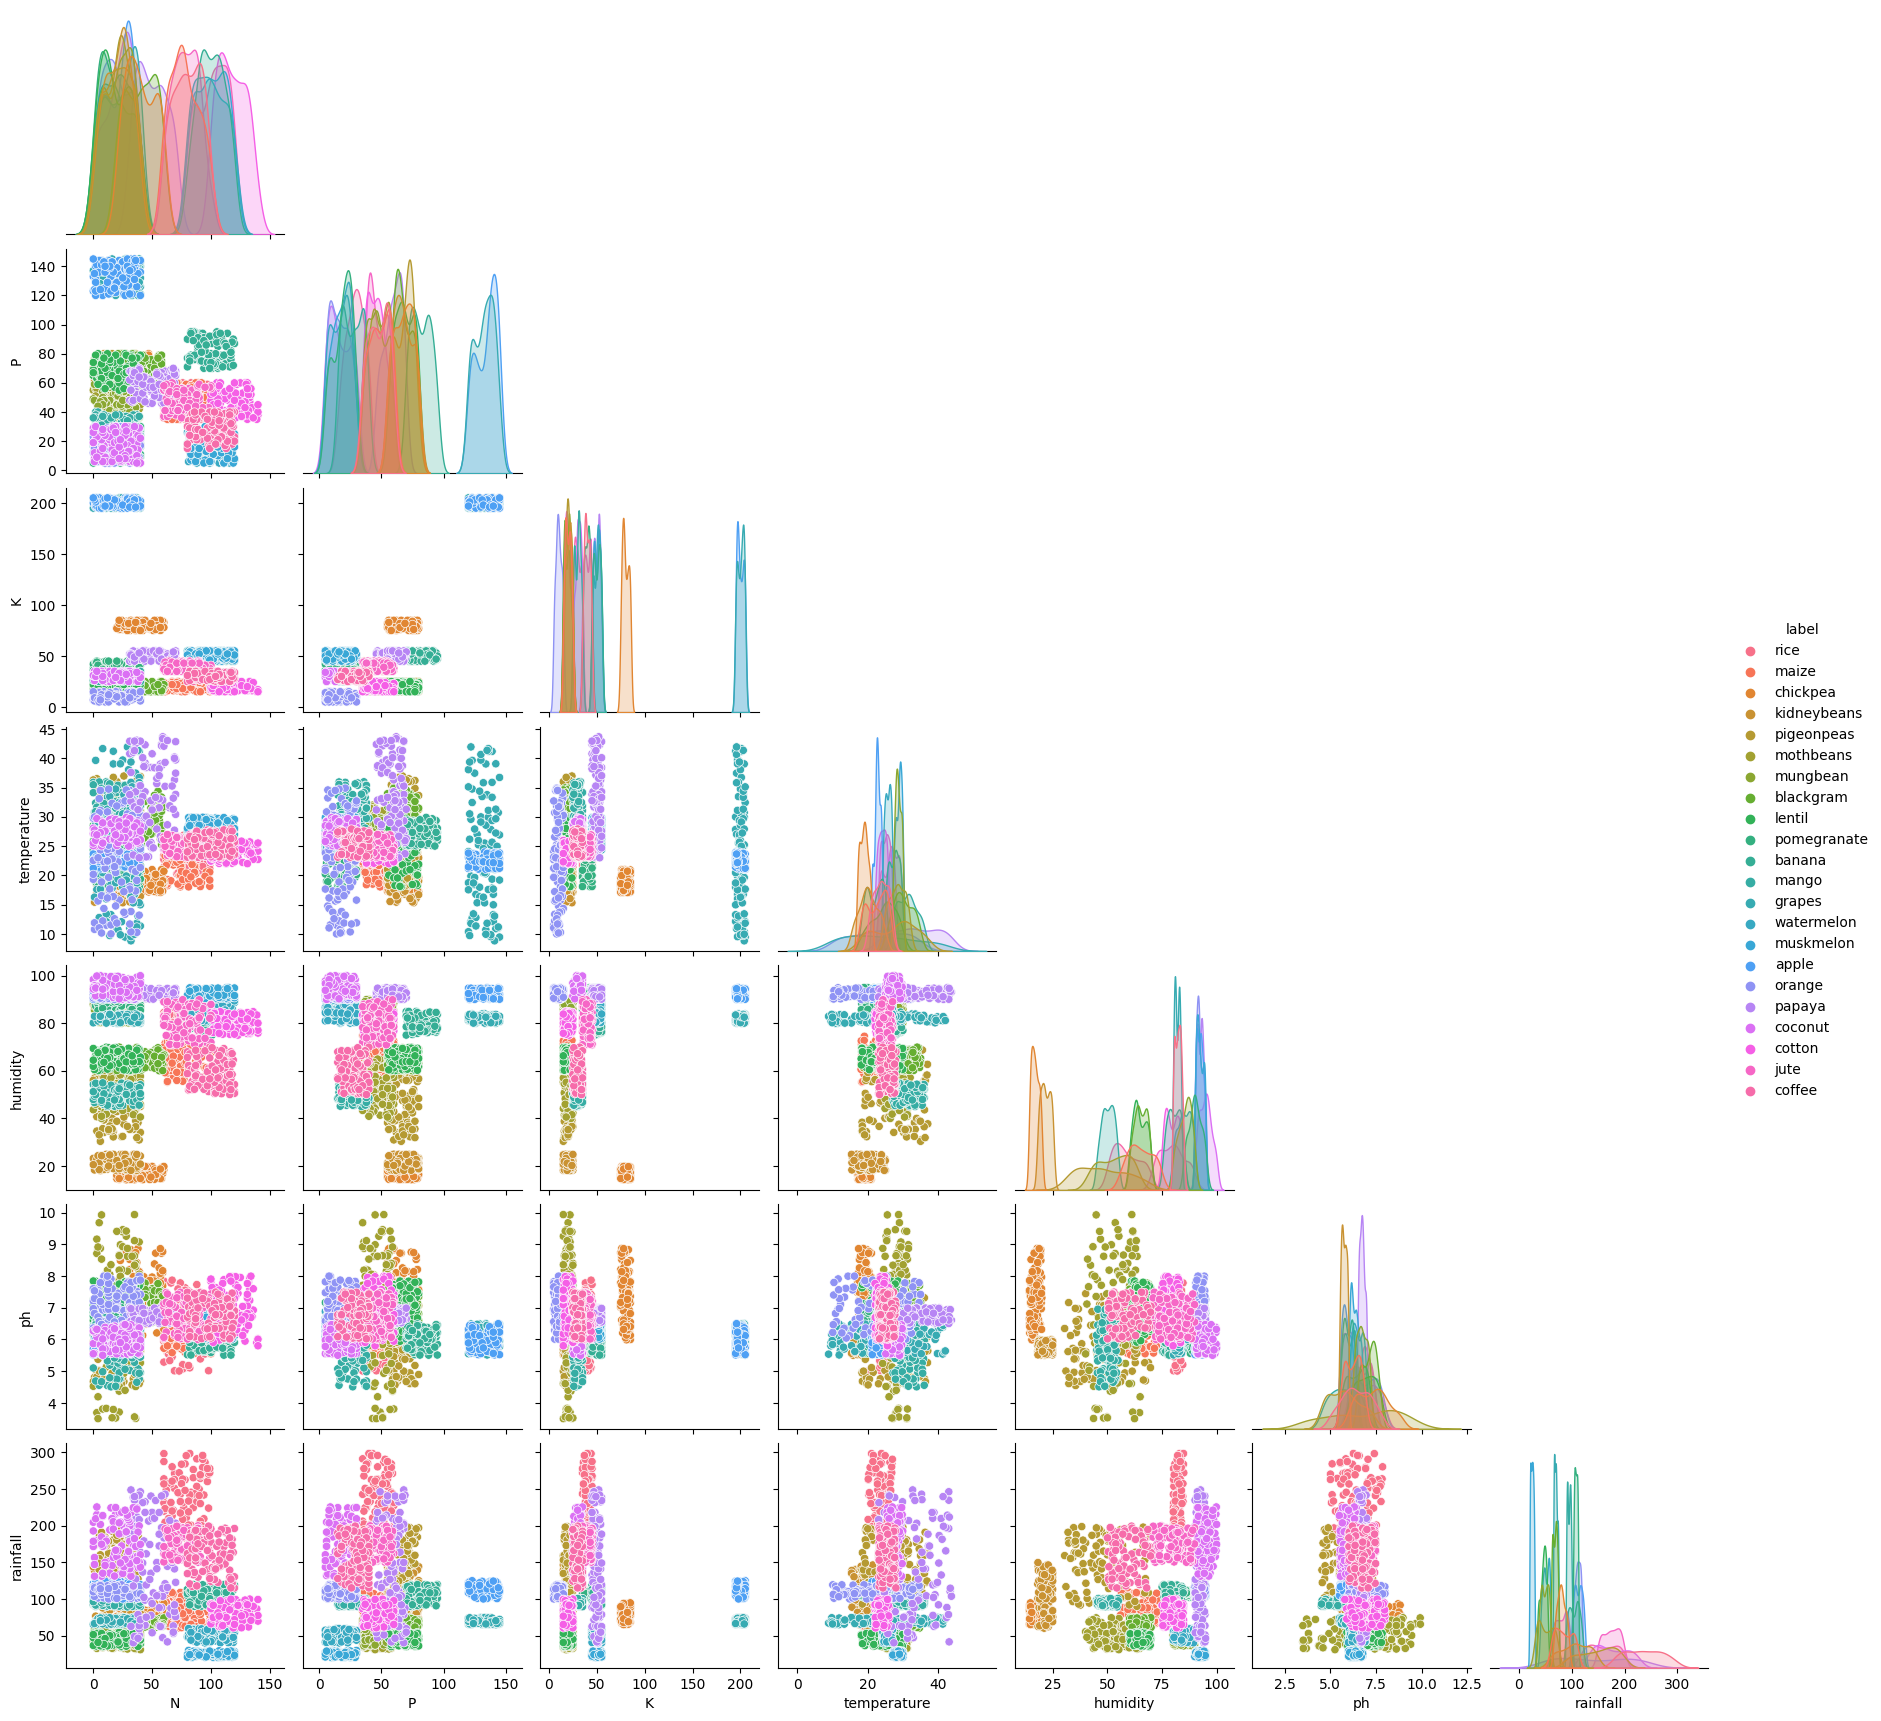

In [17]:
sns.pairplot(df, hue='label', corner=True)


In [18]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# **Feature Selection/ Importance**
Includes: 
- Scaling
- Encoding
- Feauture Selection

In [19]:
# Feature extraction using Principal Component Analysis
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X = df.drop(['label'], axis=1)
df['new_label'] = le.fit_transform(df['label'])
y = df['new_label']


pca = PCA(n_components=7)

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y.to_numpy().ravel())

importance_scores = rf_model.feature_importances_
k = 20
important_features_indices = importance_scores.argsort()[::-1][:k]
important_features_names = X.columns[important_features_indices]
print(important_features_names)



Index(['rainfall', 'humidity', 'K', 'P', 'N', 'temperature', 'ph'], dtype='object')


## Feature Subset

In [20]:
corr_coeffs = df.corr()['new_label'].abs().sort_values(ascending=False)
top_features = corr_coeffs[1:11].index.tolist()

final_feature_names = set(important_features_names) & set(top_features)
feature_subset = df[final_feature_names]
print(feature_subset)


        N   P   K        ph    rainfall   humidity  temperature
0      90  42  43  6.502985  202.935536  82.002744    20.879744
1      85  58  41  7.038096  226.655537  80.319644    21.770462
2      60  55  44  7.840207  263.964248  82.320763    23.004459
3      74  35  40  6.980401  242.864034  80.158363    26.491096
4      78  42  42  7.628473  262.717340  81.604873    20.130175
...   ...  ..  ..       ...         ...        ...          ...
2195  107  34  32  6.780064  177.774507  66.413269    26.774637
2196   99  15  27  6.086922  127.924610  56.636362    27.417112
2197  118  33  30  6.362608  173.322839  67.225123    24.131797
2198  117  32  34  6.758793  127.175293  52.127394    26.272418
2199  104  18  30  6.779833  140.937041  60.396475    23.603016

[2200 rows x 7 columns]


## Declare Independent and Target Variables

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X = feature_subset
X = X.reindex(columns=['N', 'P', 'K', 'rainfall', 'temperature', 'ph', 'humidity'])

X.head()

,N,P,K,rainfall,temperature,ph,humidity
0,90,42,43,202.935536,20.879744,6.502985,82.002744
1,85,58,41,226.655537,21.770462,7.038096,80.319644
2,60,55,44,263.964248,23.004459,7.840207,82.320763
3,74,35,40,242.864034,26.491096,6.980401,80.158363
4,78,42,42,262.717340,20.130175,7.628473,81.604873


In [23]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,new_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,5


## Train Test Split

In [26]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [27]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.2,random_state =2)

scalar = StandardScaler()
X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

# **MODELLING**

Importing Libaries


In [29]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,  StackingClassifier, VotingClassifier 
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import cross_val_score

Hyperparameter Tunning - to get the best model

In [30]:
from scipy import stats

# Define a function to tune a model using GridSearchCV
def tune_model(model, param_grid, X, Y):
    search = RandomizedSearchCV(model, param_distributions=param_grid, cv=5, n_iter=20, random_state=42, n_jobs=-1)
    search.fit(X, Y)
    print(f"Best hyperparameters for {model.__class__.__name__}: {search.best_params_}")
    return search.best_estimator_

# Define hyperparameters for each model
rf_params = {'max_depth': [2, 3, 4, 5, 6, 10, 100, 300], 
             'n_estimators': [10 , 20, 100, 500, 1000]}

svm_params = {'kernel': ['linear','poly','rbf'], 
              'C': [0.001, 0.01, 0.1, 1, 10],
              'gamma': [1, 0.1]}

knn_params = {'n_neighbors': list(range(3, 16, 2))}

xgb_params = {'n_estimators': [10, 20, 50, 100, 300, 500], 
             'learning_rate': [0.1, 0.8, 1], 
             'max_depth': [1, 2, 3, 5]}

dt_params =  {'max_depth': [2, 3, 4, 5, 6, 10, 100, 300]}



# Define models to tune
rf_model = RandomForestClassifier(random_state=42)
svm_model = SVC(class_weight='balanced', random_state=42)
knn_model = KNeighborsClassifier()
xgb_model = XGBClassifier(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)

# Tune each model and print the best estimator
rf_best = tune_model(rf_model, rf_params, X_train_scaled, Y_train)

svm_best = tune_model(svm_model, svm_params, X_train_scaled, Y_train)

knn_best = tune_model(knn_model, knn_params, X_train_scaled, Y_train)

xgb_best = tune_model(xgb_model, xgb_params, X_train_scaled, Y_train)

dt_best = tune_model(dt_model, dt_params, X_train_scaled, Y_train)



Best hyperparameters for RandomForestClassifier: {'n_estimators': 100, 'max_depth': 300}
Best hyperparameters for SVC: {'kernel': 'linear', 'gamma': 0.1, 'C': 10}
Best hyperparameters for KNeighborsClassifier: {'n_neighbors': 3}
Best hyperparameters for XGBClassifier: {'n_estimators': 300, 'max_depth': 1, 'learning_rate': 0.1}
Best hyperparameters for DecisionTreeClassifier: {'max_depth': 100}


## Random Forest Modelling 

In [31]:
RF = RandomForestClassifier(n_estimators=100, max_depth =300, random_state=42)
RF.fit(X_train_scaled,Y_train)

predicted_values_RF = RF.predict(X_test_scaled)

x = metrics.accuracy_score(Y_test, predicted_values_RF)
acc.append(x)
model.append('RF')
print("Random Forest Accuracy is: ", x)

print(classification_report(Y_test,predicted_values_RF))

Random Forest Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00 

In [32]:
score = cross_val_score(RF,X,y,cv=5)
print('Cross validation score: ',score)


Cross validation score:  [0.99772727 0.99318182 0.99545455 0.99545455 0.99090909]


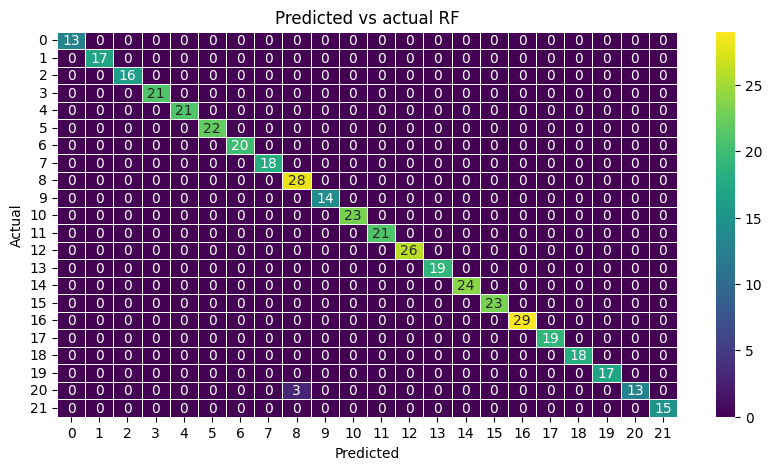

In [33]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_RF)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual RF')
plt.show()

## Support Vector Machine Modelling

In [34]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', gamma=0.1, C=10, class_weight='balanced', random_state=42)

SVM.fit(X_train_scaled,Y_train)

predicted_values_SVM = SVM.predict(X_test_scaled)

x = metrics.accuracy_score(Y_test, predicted_values_SVM)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values_SVM))

SVM's Accuracy is:  0.9772727272727273
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.81      0.93      0.87        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      1.0

In [35]:
# Cross validation score (SVM)
score = cross_val_score(SVM,X,y,cv=5)
score

array([0.98181818, 0.98863636, 0.98636364, 0.97954545, 0.98409091])

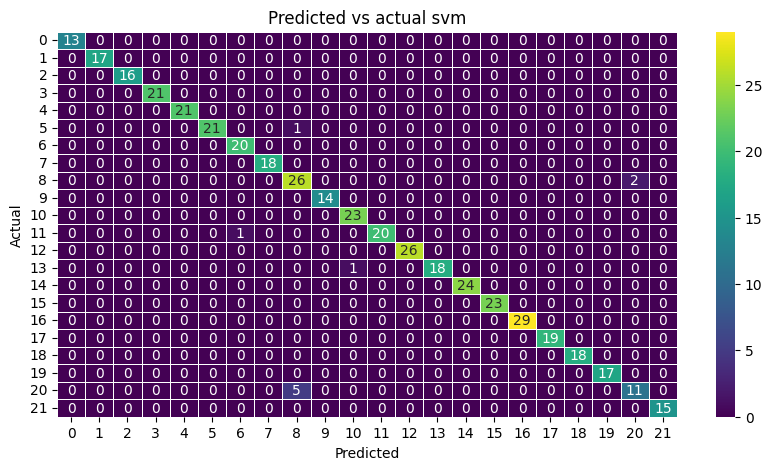

In [36]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_SVM)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual svm')
plt.show()

# KNeighborsClassifier Modelling

In [37]:
knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train_scaled,Y_train)

predicted_values_knn = knn.predict(X_test_scaled)

x = metrics.accuracy_score(Y_test, predicted_values_knn)
acc.append(x)
model.append('K Nearest Neighbours')
print("KNN Accuracy is: ", x)

print(classification_report(Y_test,predicted_values_knn))

KNN Accuracy is:  0.9681818181818181
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.84      1.00      0.91        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.87      0.93      0.90        28
           9       1.00      1.00      1.00        14
          10       0.95      0.91      0.93        23
          11       0.95      0.95      0.95        21
          12       0.96      1.00      0.98        26
          13       1.00      0.84      0.91        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      0.97      0.98 

In [38]:
score = cross_val_score(knn,X,y,cv=5)
score

array([0.97954545, 0.975     , 0.98181818, 0.99090909, 0.98181818])

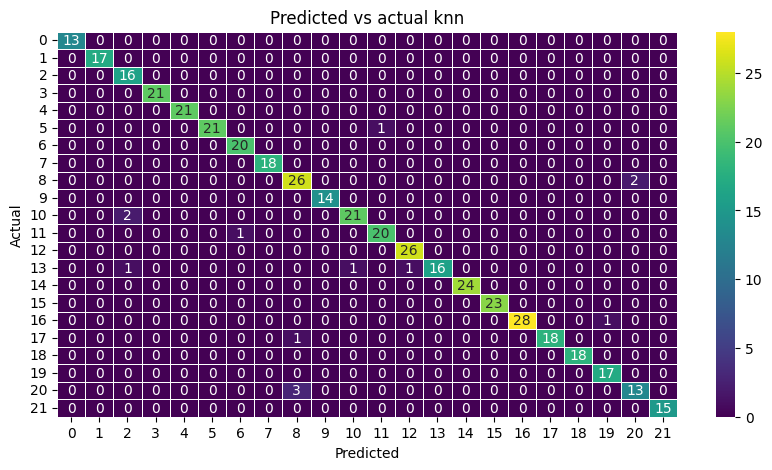

In [39]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_knn)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual knn')
plt.show()

## XGBoost Classifier Modelling

In [40]:
XB = XGBClassifier(n_estimators= 300, max_depth= 1, learning_rate=0.1, random_state = 42)
XB.fit(X_train_scaled,Y_train)

predicted_values_XB = XB.predict(X_test_scaled)

x = metrics.accuracy_score(Y_test, predicted_values_XB)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values_XB))

XGBoost's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      0.95      0.98        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      1.00      0.95        28
           9       1.00      1.00      1.00        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      0.95      0.97        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00      

In [41]:
score = cross_val_score(XB,X,y,cv=5)
score

array([0.99545455, 0.99545455, 0.99545455, 0.99090909, 0.98181818])

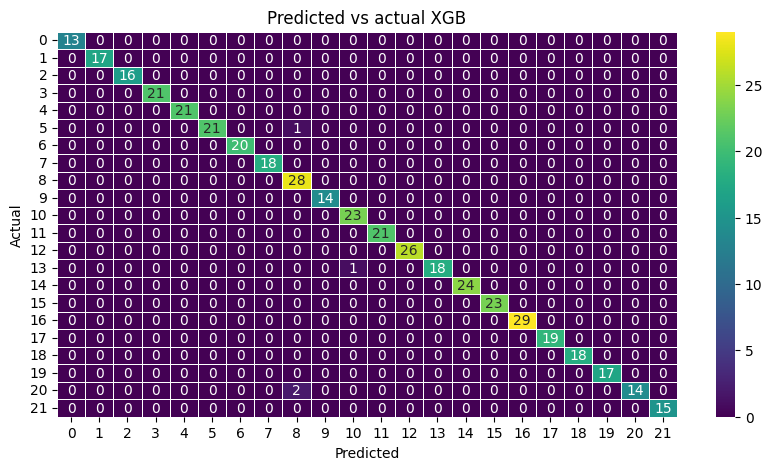

In [42]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_XB)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual XGB')
plt.show()

## Decision Tree Modelling 

In [43]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=42,max_depth=10)

DecisionTree.fit(X_train_scaled,Y_train)

predicted_values_dt = DecisionTree.predict(X_test_scaled)
x = metrics.accuracy_score(Y_test, predicted_values_dt)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Y_test,predicted_values_dt))

DecisionTrees's Accuracy is:  98.4090909090909
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       0.94      1.00      0.97        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.90      0.96      0.93        28
           9       1.00      0.93      0.96        14
          10       0.96      1.00      0.98        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       0.94      0.89      0.92        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00 

In [44]:
score = cross_val_score(DecisionTree, X, y,cv=5)
print('Cross validation score for Decision Tree: ',score)

Cross validation score for Decision Tree:  [0.99090909 0.97272727 0.99318182 0.97954545 0.97954545]


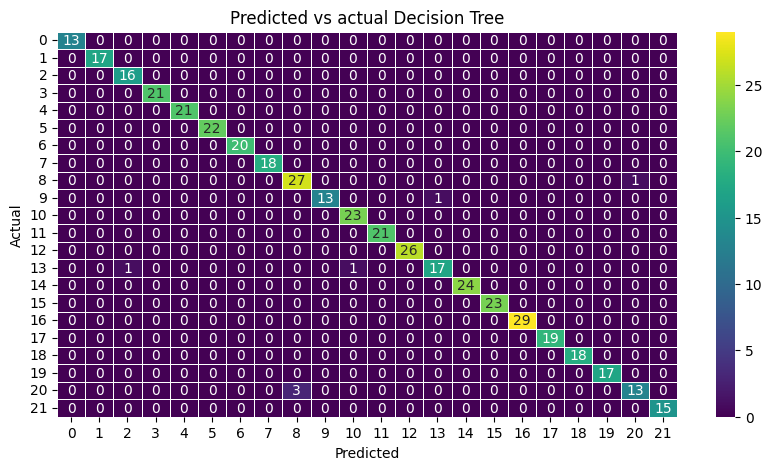

In [45]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_dt)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual Decision Tree')
plt.show()

## Guassian Naive Bayes

In [46]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train_scaled,Y_train)

predicted_values_NB = NaiveBayes.predict(X_test_scaled)
x = metrics.accuracy_score(Y_test, predicted_values_NB)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Y_test,predicted_values_NB))

Naive Bayes's Accuracy is:  0.990909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        16
           3       1.00      1.00      1.00        21
           4       1.00      1.00      1.00        21
           5       1.00      1.00      1.00        22
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.88      1.00      0.93        28
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        23
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        26
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16       1.00      1.00  

In [47]:
score = cross_val_score(NaiveBayes, X, y,cv=5)
print('Cross validation score for NaiveBayes: ',score)

Cross validation score for NaiveBayes:  [0.99772727 0.99545455 0.99545455 0.99545455 0.99090909]


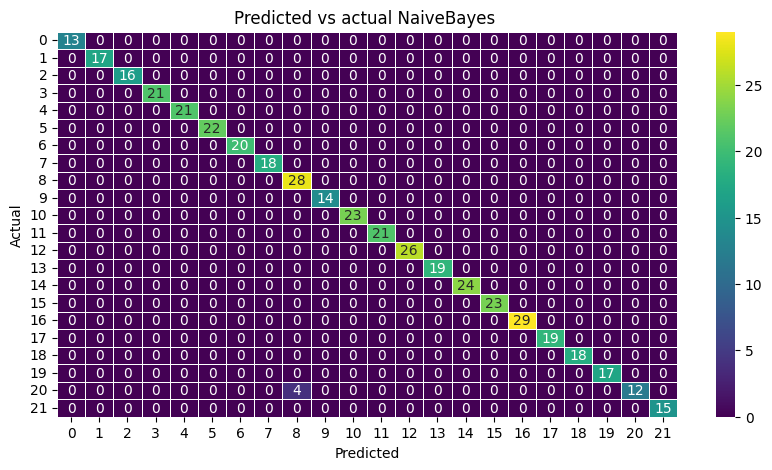

In [48]:
# Confusion Matrix
y_true = Y_test
cm_rf = confusion_matrix(y_true, predicted_values_NB)

f, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(cm_rf, annot=True, linewidth=0.5, fmt=".0f",  cmap='viridis', ax = ax)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title('Predicted vs actual NaiveBayes ')
plt.show()

Accuracy Comparison

<Axes: title={'center': 'Accuracy Comparison'}, xlabel='Accuracy', ylabel='Algorithm'>

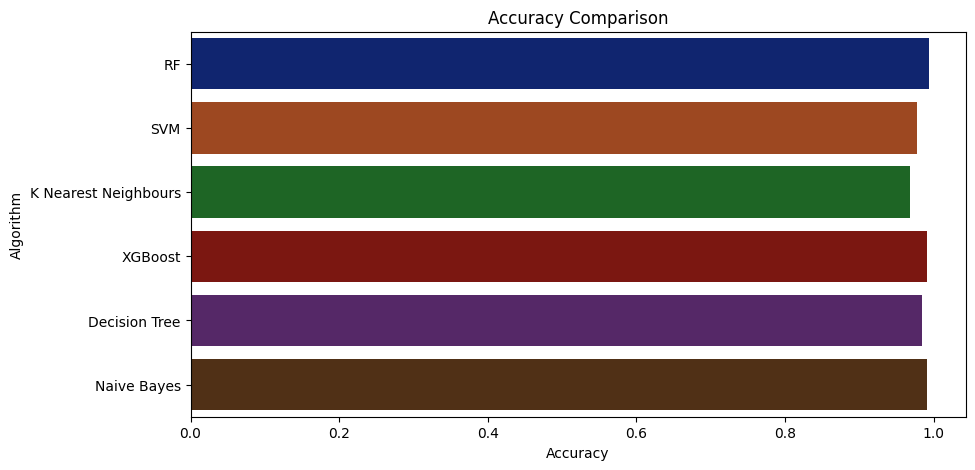

In [49]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## ENSEMBLE MODELLING

The top 3 models are XGBoost, Random Forest, and Naive Bayes
Combining the top-3 models in an attempt to get a more accurate prediction model.

The ensemble model will be done in two methods: 
- Stacking model 
- Majority vote.

In [50]:
estimators = [('rf_stck', RandomForestClassifier(n_estimators=20, max_depth =10, random_state=42)),
               ('nv_stck', GaussianNB()),
              ('xgb_stck', XGBClassifier(max_depth=1, n_estimators=50, random_state=42, learning_rate=0.1))]


X_train80, X_val, y_train80, y_val = train_test_split(X_train, Y_train, train_size=0.8, random_state=42, stratify=Y_train)

### Stacking Ensemble Modelling

Stacking the predictions of top-3 models and fit them in another model (final estimator).



In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

final_estimator = LogisticRegression(max_iter=400) 

stck = StackingClassifier(estimators=estimators, final_estimator=final_estimator, stack_method='predict')

accuracy = stck.fit(X_train80, y_train80).score(X_val, y_val)
print(f"\nStacking model accuracy: {accuracy:.2f}\n")

stck_pred = stck.predict(X_val)
f1 = f1_score(y_val, stck_pred, average='macro')
print(f"\nStacking model f1 score: {f1:.2f}\n")


Stacking model accuracy: 0.75


Stacking model f1 score: 0.69



### Majority Vote Based Ensemble Modelling

In [52]:
vote = VotingClassifier(estimators=estimators, voting='soft')
accuracy = vote.fit(X_train80, y_train80).score(X_val, y_val)
print(f"\nMajority vote accuracy: {accuracy:.2f}\n")

vote_pred = vote.predict(X_val)
f1 = f1_score(y_val, vote_pred, average='macro')
print(f"\nMajority vote model f1 score: {f1:.2f}\n")


Majority vote accuracy: 1.00


Majority vote model f1 score: 1.00



Based on the results,  the voting classifier ensemble model has a perfect accuracy score of 1.00, which is significantly higher than the accuracy scores of the individual models. This indicates that the ensemble model has a higher level of predictive power and is better at generalizing to new data.

The voting classifier combines the predictions of multiple individual models to make a final prediction. In this case, the majority vote method was used, which means that the final prediction is based on the most commonly predicted class by the individual models. The perfect accuracy score of 1.00 suggests that the individual models had different areas of strength, which the voting classifier was able to capitalize on to achieve superior performance.

The stacking model, on the other hand, has relatively poor performance, with an accuracy of 0.75 and an F1 score of 0.69. Therefore, the voting classifier is the recommended ensemble model to use.

In [53]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
file_path = '/content/drive/My Drive/Summative-AI/Croprecommend.pkl'
# Open the file to save as pkl file
BM_Model_pkl = open(file_path, 'wb')
pickle.dump(vote, BM_Model_pkl)
# Close the pickle instances
BM_Model_pkl.close()

# **Predicting on Unseen Data :)**

In [54]:
N = 90
P = 42
K = 43
temperature = 20.879744
humidity = 82.002744
ph = 6.502985
rainfall = 202.935536

sample = np.array([N, P, K, rainfall, temperature, ph, humidity])
single_sample = np.array(sample).reshape(1,-1)

pred = vote.predict(single_sample)

# Fit the label encoder to the label data
le.fit(df['label'])

with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)
# Decode the predicted label
pred_crop = le.inverse_transform(pred)

print(pred_crop)


['rice']


In [57]:
N = 67	
P = 44
K = 30
temperature = 24.131797	
humidity = 87.225123
ph = 6.362608
rainfall = 173.322839

sample = np.array([N, P, K, rainfall, temperature, ph, humidity])
single_sample = np.array(sample).reshape(1,-1)

pickled_model = pickle.load(open('/content/drive/My Drive/Summative-AI/Croprecommend.pkl', 'rb'))
pred = pickled_model.predict(single_sample)

# Fit the label encoder to the label data
le.fit(df['label'])

# Decode the predicted label
pred_crop = le.inverse_transform(pred)

print(pred_crop)

['jute']


In [56]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label,new_label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,20
